# Titanic Survival Prediction using ML Models

| Attribute | Details |
|-----------|---------|
| **Author** | **`Muhammad Haroon ul Hasnain`** |
| **Kaggle** | [![Kaggle Badge](https://img.shields.io/badge/Kaggle-035a7d?style=for-the-badge&logo=kaggle&logoColor=white)](https://www.kaggle.com/haroon669) |
| **GitHub** | [![GitHub Badge](https://img.shields.io/badge/github-%23121011.svg?style=for-the-badge&logo=github&logoColor=white)](https://github.com/hasnain1669) |
| **LinkedIn** | [![LinkedIn](https://img.shields.io/badge/linkedin-%230077B5.svg?style=for-the-badge&logo=linkedin&logoColor=white)](https://www.linkedin.com/in/muhammad-haroon-ul-hasnain/) |
| **Twitter** | [![Twitter Badge](https://img.shields.io/badge/Twitter-%23000000.svg?style=for-the-badge&logo=Twitter&logoColor=white)](https://twitter.com/hasnain1669) |


## Dataset Description
##### Overview

This dataset has been split into two groups: `Training Data` and `Testing Data`. The `Training Data` is used to train and build the Machine Learning Models, while the `Testing Data` is used to test the performance of the trained model. 

##### Data Dictionary

This Dataset contains the following columns:
- `PassengerId` - A unique ID for each passenger.
- `Survived` - Whether the passenger survived or not. (0 = No, 1 = Yes)
- `Pclass` - The class of the ticket the passenger purchased. (1 = 1st Class, 2 = 2nd Class, 3 = 3rd Class)
- `Name` - The name of the passenger.
- `Sex` - Whether the passenger was Male or Female.
- `Age` - Age of the passenger in years.
- `Sibsp` - The number of siblings or spouses the passenger had aboard the Titanic.
- `Parch` - The number of parents or children the passenger had aboard the Titanic.
- `Ticket` - The ticket number of the passenger.
- `Fare` - The amount of money the passenger paid for the ticket.
- `Cabin` - The cabin number of the passenger according to the each deck.
- `Embarked` - The port from where the passenger were boarded the Titanic. (C = Cherbourg, Q = Queenstown, S = Southampton)

#### Acknowledgements

This dataset is taken from the Kaggle Competition [Titanic: Machine Learning from Disaster](https://www.kaggle.com/c/titanic/overview)

## Problem Statement
The problem is to predict the survival of the passengers aboard the Titanic. The dataset contains the information of the passengers and the target variable is `Survived` which is a binary variable (0 = No, 1 = Yes). The task is to build a Machine Learning Model that can predict the survival of the passengers based on the given features. 

## Evaluation Metric
The evaluation metric for this problem is `Accuracy`. The accuracy of the model will be calculated on the basis of the number of correct predictions made by the model. 

## Table of Contents
The notebook is divided into the following main sections:
1. **Data Preprocessing**
    - Importing Libraries
    - Loading the Dataset
    - Exploratory Data Analysis (EDA)
    - Data Preprocessing
2. **Model Building**
    - Splitting the Data into Training and Testing Sets
    - Model Selection
    - Model Training
    - Model Evaluation
3. **Model Evaluation**
    - Model Comparison
    - Model Evaluation
    - Model Interpretation
4. **Model Prediction**
    - Making Predictions
    - Creating Submission File

#### Questions which will be answered in this notebook:

1.  What is the survival rate for passengers in each of the three classes (1st, 2nd, 3rd)?
2.  How does the survival rate compare between males and females?
3.  What is the distribution of ages among the passengers, and does age appear to influence the chance of survival?
4.  Is there a correlation between the fare paid and passenger survival? Did passengers who paid higher fares have a higher survival rate?
5.  Can we observe any patterns in survival rate based on the passenger's port of embarkation (Cherbourg, Queenstown, Southampton)?
6.  Are there differences in survival rates among different age groups (children, adults, seniors)?
7.  How does the survival rate of solo passengers compare to those traveling with family (siblings, spouses, parents, or children)?

## 1. Data Preprocessing
In this section, we will perform the Data Preprocessing tasks including loading the dataset, performing Exploratory Data Analysis (EDA), Data Cleaning, Feature Engineering, and Data Preprocessing.

##### 1.1 Importing Libraries

In [50]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import plotly.express as px
from statsmodels import stats
from sklearn.model_selection import train_test_split
from sklearn.model_selection import cross_val_score, KFold 
from sklearn.preprocessing import LabelEncoder, OneHotEncoder, StandardScaler 
from sklearn.metrics import classification_report, accuracy_score, confusion_matrix, precision_score 
from sklearn.ensemble import RandomForestClassifier
from sklearn.tree import DecisionTreeClassifier
from sklearn.svm import SVC
from sklearn.linear_model import LogisticRegression
from sklearn.neighbors import KNeighborsClassifier
from sklearn.naive_bayes import GaussianNB
from xgboost import XGBClassifier
from sklearn.ensemble import GradientBoostingClassifier 
from sklearn.ensemble import AdaBoostClassifier
from sklearn.ensemble import BaggingClassifier 
import warnings
warnings.filterwarnings('ignore')

##### 1.2 Loading the Dataset

In [2]:
# Load the data
df_train = pd.read_csv('train.csv')
df_test = pd.read_csv('test.csv')

##### 1.3 Exploratory Data Analysis (EDA)
in this section, we will perform the Exploratory Data Analysis (EDA) to understand the data and its distribution.

In [3]:
# Display the first 5 rows of the train dataset
df_train.head()

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
0,1,0,3,"Braund, Mr. Owen Harris",male,22.0,1,0,A/5 21171,7.2500,NaN,S
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,PC 17599,71.2833,C85,C
2,3,1,3,"Heikkinen, Miss. Laina",female,26.0,0,0,STON/O2. 3101282,7.9250,NaN,S
3,4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.0,1,0,113803,53.1000,C123,S
4,5,0,3,"Allen, Mr. William Henry",male,35.0,0,0,373450,8.0500,NaN,S


In [4]:
# Display the first 5 rows of the test dataset
df_test.head()

,PassengerId,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
0,892,3,"Kelly, Mr. James",male,34.5,0,0,330911,7.8292,NaN,Q
1,893,3,"Wilkes, Mrs. James (Ellen Needs)",female,47.0,1,0,363272,7.0000,NaN,S
2,894,2,"Myles, Mr. Thomas Francis",male,62.0,0,0,240276,9.6875,NaN,Q
3,895,3,"Wirz, Mr. Albert",male,27.0,0,0,315154,8.6625,NaN,S
4,896,3,"Hirvonen, Mrs. Alexander (Helga E Lindqvist)",female,22.0,1,1,3101298,12.2875,NaN,S


In [5]:
# Display the info of the train dataset
df_train.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 891 entries, 0 to 890
Data columns (total 12 columns):
 #   Column       Non-Null Count  Dtype  
---  ------       --------------  -----  
 0   PassengerId  891 non-null    int64  
 1   Survived     891 non-null    int64  
 2   Pclass       891 non-null    int64  
 3   Name         891 non-null    object 
 4   Sex          891 non-null    object 
 5   Age          714 non-null    float64
 6   SibSp        891 non-null    int64  
 7   Parch        891 non-null    int64  
 8   Ticket       891 non-null    object 
 9   Fare         891 non-null    float64
 10  Cabin        204 non-null    object 
 11  Embarked     889 non-null    object 
dtypes: float64(2), int64(5), object(5)
memory usage: 83.7+ KB


## Observations of the Dataset:
- The dataset contains 891 rows and 12 columns.
- The dataset contains 5 integer columns, 2 float columns, (7 Numerical Columns) and 5 object columns (5 Categorical Columns).
- The dataset contains missing values in the columns `Age`, `Cabin`, and `Embarked`.

In [6]:
# Display the shape of the train and test dataset
print('Training Dataset:', df_train.shape)
print('Testing Dataset:', df_test.shape)

Training Dataset: (891, 12)
Testing Dataset: (418, 11)


In [7]:
# Display the 5 Number summary of the training dataset
df_train.describe()


,PassengerId,Survived,Pclass,Age,SibSp,Parch,Fare
count,891.000000,891.000000,891.000000,714.000000,891.000000,891.000000,891.000000
mean,446.000000,0.383838,2.308642,29.699118,0.523008,0.381594,32.204208
std,257.353842,0.486592,0.836071,14.526497,1.102743,0.806057,49.693429
min,1.000000,0.000000,1.000000,0.420000,0.000000,0.000000,0.000000
25%,223.500000,0.000000,2.000000,20.125000,0.000000,0.000000,7.910400
50%,446.000000,0.000000,3.000000,28.000000,0.000000,0.000000,14.454200
75%,668.500000,1.000000,3.000000,38.000000,1.000000,0.000000,31.000000
max,891.000000,1.000000,3.000000,80.000000,8.000000,6.000000,512.329200


In [8]:
# Survival count with respect to Pclass
round(df_train.groupby('Pclass')['Survived'].value_counts()*100/len(df_train),2)

Pclass  Survived
1       1           15.26
        0            8.98
2       0           10.89
        1            9.76
3       0           41.75
        1           13.36
Name: count, dtype: float64

Text(0.5, 1.0, 'Survival count with respect to Pclass')

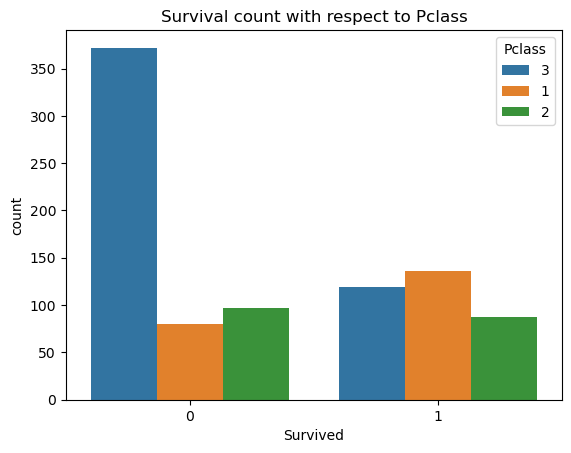

In [9]:
# Visualization representation of the survival count with respect to Pclass
sns.countplot(data=df_train, x=df_train['Survived'].astype(str), hue=df_train['Pclass'].astype(str))
plt.title('Survival count with respect to Pclass')

1.  What is the survival rate for passengers in each of the three classes (1st, 2nd, 3rd)?

The survival rate for passengers in each of the three classes is as follows:
- 1st Class: 15.26%
- 2nd Class: 9.76%
- 3rd Class: 13.36%

So, the survival rate is highest for the passengers in 1st Class, followed by 3rd and 2nd Class.

In [10]:
# Survival rate by Gender
round(df_train.groupby('Sex')['Survived'].value_counts()*100/len(df_train),2)

Sex     Survived
female  1           26.15
        0            9.09
male    0           52.53
        1           12.23
Name: count, dtype: float64

Text(0.5, 1.0, 'Survival rate with Gender')

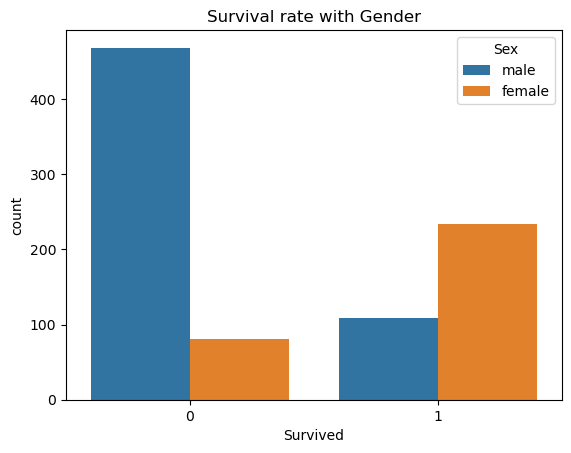

In [11]:
# Visualization representation of the Survival rate with respect to Gender
sns.countplot(data=df_train, x='Survived', hue='Sex')
plt.title('Survival rate with Gender')


2.  How does the survival rate compare between males and females?

The survival rate compare to the gender perspective is as females have a higher survival rate `26.15%` as compared to males `12.23%`.

In [12]:
# Survival ratio with Age
bins = [0, 20, 40, 60, 80]
labels = ['0-20', '20-40', '40-60', '60-80']
df_train['AgeGroup'] = pd.cut(df_train['Age'], bins=bins, labels=labels)
df_train.groupby('AgeGroup')['Survived'].value_counts()*100/len(df_train)
round(df_train['AgeGroup'].value_counts()*100/len(df_train),2)

AgeGroup
20-40    43.21
0-20     20.09
40-60    14.37
60-80     2.47
Name: count, dtype: float64

Text(0.5, 1.0, 'Age Distribution')

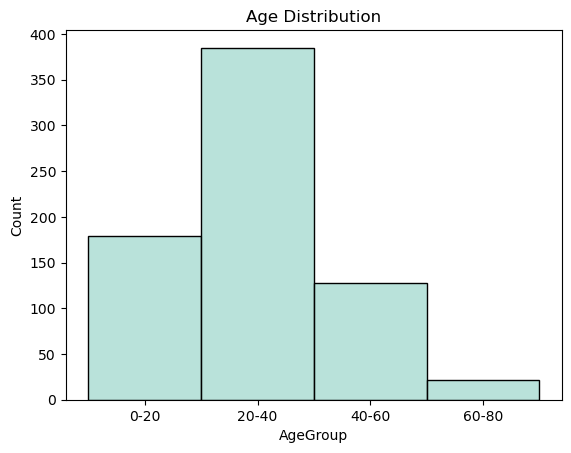

In [13]:
sns.histplot(df_train['AgeGroup'], color='#A2D9CE')
plt.title('Age Distribution')

3.  What is the distribution of ages among the passengers, and does age appear to influence the chance of survival?
   
The distribution of Survival rate with respect to ages of the passengers is as follows:
- The age of Survived between `0 to 20`years is `20.09%`
- The age of Survived between `20 to 40`years is `43.21%`
- The age of Survived between `40 to 60`years is `14.37%`
- The age of Survived between `60 to 80`years is `2.47%`

So, the age of the passengers does influence the chance of survival. The passengers between the age of 20 to 40 years have the highest survival rate.


4.  Are there differences in survival rates among different age groups (children, adults, seniors)?

The survival rate of your aduls is more than other age groups, the minimum survival rate is for the seniors(old age people).

In [14]:
df_train.columns

Index(['PassengerId', 'Survived', 'Pclass', 'Name', 'Sex', 'Age', 'SibSp',
       'Parch', 'Ticket', 'Fare', 'Cabin', 'Embarked', 'AgeGroup'],
      dtype='object')

Text(0.5, 1.0, 'Correlation Matrix of the Features')

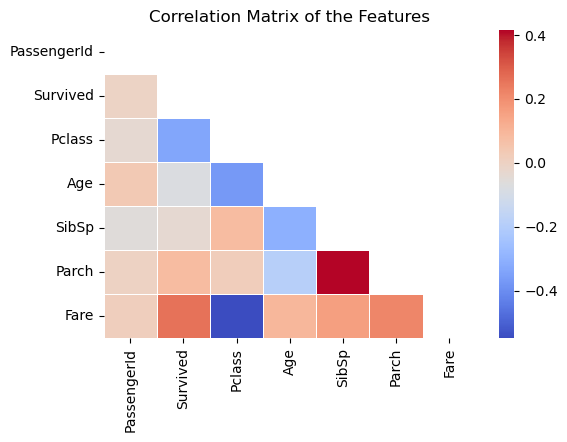

In [15]:
# Correlation between the features
plt.figure(figsize=(6, 4))
num_cols = df_train.select_dtypes(include=['int64', 'float64']).columns
correlation = df_train[num_cols].corr()
mask = np.triu(correlation)
sns.heatmap(correlation, annot=True, fmt='.2f', cmap='coolwarm', linewidths=0.5, mask=mask)
plt.title('Correlation Matrix of the Features')

In [16]:
# Coorelation between the numeric features and the target variable
num_cols = df_train.select_dtypes(include=['int64', 'float64']).columns
round(df_train[num_cols].corr(),3)


,PassengerId,Survived,Pclass,Age,SibSp,Parch,Fare
PassengerId,1.000,-0.005,-0.035,0.037,-0.058,-0.002,0.013
Survived,-0.005,1.000,-0.338,-0.077,-0.035,0.082,0.257
Pclass,-0.035,-0.338,1.000,-0.369,0.083,0.018,-0.549
Age,0.037,-0.077,-0.369,1.000,-0.308,-0.189,0.096
SibSp,-0.058,-0.035,0.083,-0.308,1.000,0.415,0.160
Parch,-0.002,0.082,0.018,-0.189,0.415,1.000,0.216
Fare,0.013,0.257,-0.549,0.096,0.160,0.216,1.000


5.  Is there a correlation between the fare paid and passenger survival? Did passengers who paid higher fares have a higher survival rate?

The correlation between the fare and passenger survival is `0.257`. This means that passengers who paid higher fares had a higher survival rate.
The correlation between the Parch and passenger survival is `0.082`. This means that passengers who had more parents or children aboard had a higher survival rate.
The correlation between the SibSp and passenger survival is `-0.035`. This means that passengers who had more siblings or spouses aboard had a lower survival rate.
The correlation between the Age and passenger survival is `-0.077`. This means that the age of the passengers does not have a significant impact on the survival rate.

In [17]:
round(pd.crosstab(df_train['Embarked'], df_train['Survived'], margins=True, margins_name='Total')*100/len(df_train),2)

Survived,0,1,Total
Embarked,,,
C,8.42,10.44,18.86
Q,5.27,3.37,8.64
S,47.92,24.35,72.28
Total,61.62,38.16,99.78


Text(0.5, 1.0, 'Survival rate with respect to Embarked')

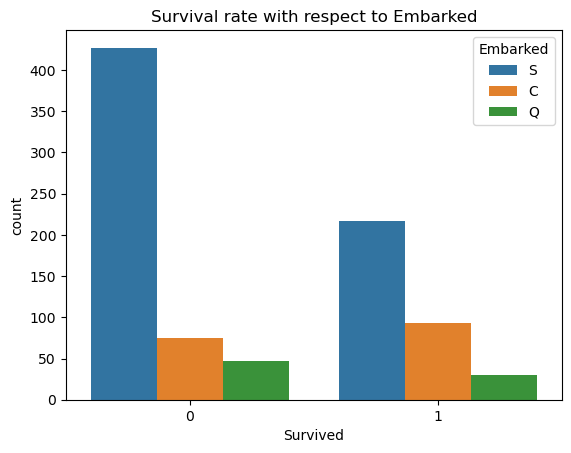

In [18]:
# Visual representation of the survival rate with respect to Embarked
sns.countplot(data=df_train, x='Survived', hue='Embarked')
plt.title('Survival rate with respect to Embarked')

6.  Can we observe any patterns in survival rate based on the passenger's port of embarkation (Cherbourg, Queenstown, Southampton)?

The survival rate based on the passenger's port of embarkation is as follows:
- Cherbourg: 10.44%
- Queenstown: 3.37%
- Southampton: 24.35%

So, the passengers who boarded the Titanic from Southampton have the highest survival rate, followed by Cherbourg and Quenstown. 

In [19]:
# Survival rate with respect to SibSp & Parch
df_train['fm_size'] = df_train['SibSp'] + df_train['Parch']
round(df_train.groupby('fm_size')['Survived'].value_counts()*100/len(df_train),2)

fm_size  Survived
0        0           41.98
         1           18.29
1        1            9.99
         0            8.08
2        1            6.62
         0            4.83
3        1            2.36
         0            0.90
4        0            1.35
         1            0.34
5        0            2.13
         1            0.34
6        0            0.90
         1            0.45
7        0            0.67
10       0            0.79
Name: count, dtype: float64

Text(0.5, 1.0, 'Survival rate with respect to fm_size')

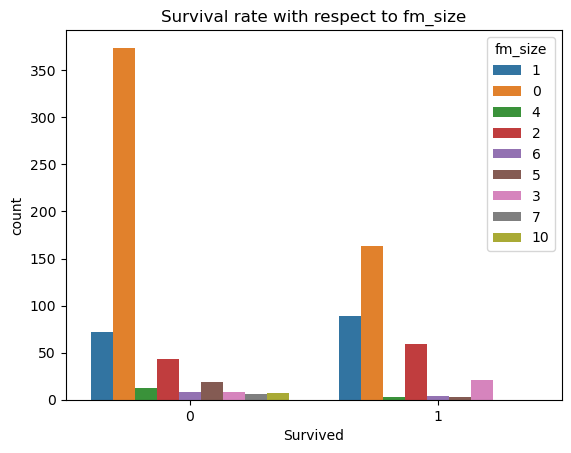

In [20]:
# visualization representation of the survival rate with respect to fm_size
sns.countplot(data=df_train, x=df_train['Survived'].astype(str), hue=df_train['fm_size'].astype(str))
plt.title('Survival rate with respect to fm_size')

7.  How does the survival rate of solo passengers compare to those traveling with family (siblings, spouses, parents, or children)?

The survival rate of solo passengers is `18.29`% and the survival rate of passengers aboard with family or siblings is `17.4`%. So, the survival rate of solo passengers is slightly higher than the passengers traveling with family and siblings.

## Observations of the 5 Number Summary of the Dataset:
- The average age of the passengers is `29.7` years, and the minimum age of the passengers is 0.42 years `4 months`, and the maximum age of the passengers is `80` years.
- The average fare of the tickets is `32.20`, and the minimum fare of the tickets is `0`, and the maximum fare of the tickets is `512.33`.It means that some passengers were traveling for free, whether they were passengers or crew members.
- The average number of siblings or spouses is 0.52, that means it `52%`.
- The average number of parents or children is 0.38, that means it `38%`.
- The average survival rate is 0.38, `38%` of survived passengers and `62%` not survived.
- The average class of the tickets is 2.30, and the minimum class of the tickets is 1, while the maximum is 3.
- The maximum survival rate of embarked passengers is `Cherbourg` which is `10.44`%. The minimum survival rate of embarked passengers is `Queenstown` which is `3.37`%.
- The Parents, Children, Siblings, and Spouses survival rate is slightly less than the solo passengers, which is `17.4`%, and `18.29`%. 

##### 1.4 Data Cleaning
In this section, we will perform the Data Cleaning tasks including handling missing values, encoding categorical variables, and feature scaling.

In [21]:
# check for missing values in the dataset
missing_val = df_train.isnull().sum().sort_values(ascending=False)*100/len(df_train)
missing_val = missing_val[missing_val > 0]
missing_val

Cabin       77.104377
Age         19.865320
AgeGroup    19.865320
Embarked     0.224467
dtype: float64

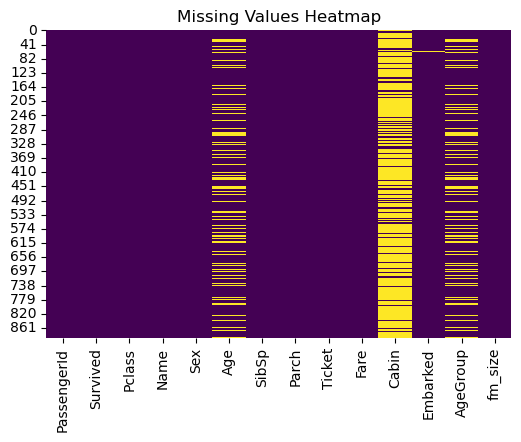

In [22]:
# heatmap of the missing values
plt.figure(figsize=(6, 4))
sns.heatmap(df_train.isnull(), cbar=False, cmap='viridis')
plt.title('Missing Values Heatmap')
plt.show()

In [23]:
# Imputing the missing values in the Age column with the mean
df_train['Age'] = df_train['Age'].fillna(df_train['Age']).mean()

In [24]:
# Imputing the missing values in the Embarked column with the mode
df_train['Embarked'] = df_train['Embarked'].fillna(df_train['Embarked'].mode()[0])

## Observations:
- The missing values in the `Age` column are `19.87`%, and these are filled with the mean age of the passengers.
- The missing values in the `Cabin` column are `77.10`%, and these are more than half data so, we removed this column. Because it will not affect the model performance.     

The `Cabin` column has a lot of missing values, so we will drop this column from the dataset, because it won't impact on the model performance and also, `PassengerId` column. The Age column has `19.87%` missing values, that we imputed with the mean of Age. The Embarked column has `0.22%` missing values, that I imputed with the Mode of Embarked. 

In [25]:
# Drop the Cabin columns
df_train.drop(['Cabin', 'AgeGroup', 'Name', 'fm_size'], axis=1, inplace=True)

In [26]:
df_train.isnull().sum()

PassengerId    0
Survived       0
Pclass         0
Sex            0
Age            0
SibSp          0
Parch          0
Ticket         0
Fare           0
Embarked       0
dtype: int64

##### 1.6 Data Preprocessing
the data preprocessing includes the following steps:
- Encoding Categorical Variables
- Splitting the Data into Training and Testing Sets
- Feature Scaling

In [27]:
df_train.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 891 entries, 0 to 890
Data columns (total 10 columns):
 #   Column       Non-Null Count  Dtype  
---  ------       --------------  -----  
 0   PassengerId  891 non-null    int64  
 1   Survived     891 non-null    int64  
 2   Pclass       891 non-null    int64  
 3   Sex          891 non-null    object 
 4   Age          891 non-null    float64
 5   SibSp        891 non-null    int64  
 6   Parch        891 non-null    int64  
 7   Ticket       891 non-null    object 
 8   Fare         891 non-null    float64
 9   Embarked     891 non-null    object 
dtypes: float64(2), int64(5), object(3)
memory usage: 69.7+ KB


Encoding the Categorical Variables:
- The `Sex` column is encoded using the `Label Encoder` from the `sklearn.preprocessing` module.
- The `Embarked` column is encoded using the `OneHotEncoder` from the `sklearn.preprocessing` module.
- The `Ticket` column is encoded using the `Label Encoder` from the `sklearn.preprocessing` module.

In [28]:
# def encoder (data):
#     label_encoder = LabelEncoder()
#     # Use Loop 
#     for col in data.columns:
#         if data[col].dtypes == 'object':
#             data[col] = label_encoder.fit_transform(data[[col]])

#     return data

# # Use Case
# df_train = encoder(df_train)
# df_test = encoder(df_test)

In [29]:
# Encoding the categorical columns
label_encoder = LabelEncoder()
# ohe = OneHotEncoder()
# fit and transform
df_train['Sex'] = label_encoder.fit_transform(df_train['Sex'])
df_train['Ticket'] = label_encoder.fit_transform(df_train['Ticket'])
# df_train['Embarked'] = ohe.fit_transform(df_train['Embarked'].values.reshape(-1, 1)).toarray()
df_train['Embarked'] = label_encoder.fit_transform(df_train['Embarked'])

In [30]:
# Transpose the encoded "Embarked" column
# df_train['Embarked'] = ohe.fit_transform(df_train['Embarked'].values.reshape(-1, 1)).toarray().T[0]

## Build the Model and Train the Model

In [31]:
# split the data into train test split 
X = df_train.drop('Survived', axis=1)
y = df_train['Survived']

# split the data into train test split
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

Select the model from the above model lists and train them on the training data.

In [32]:
from sklearn.ensemble import RandomForestClassifier
clf_models = [RandomForestClassifier(), LogisticRegression(), KNeighborsClassifier(), SVC(), DecisionTreeClassifier(), GradientBoostingClassifier(), XGBClassifier()]
label = ['RandomForestClassifier', 'LogisticRegression', 'KNeighborsClassifier', 'SVC', 'DecisionTreeClassifier', 'GradientBoostingClassifier', 'XGBClassifier']
val_score = []

# for i in clf_models:
#     model = i
#     model.fit(X_train, y_train)
#     pred = model.predict(X_test)
#     accuracy.append(model.score(X_test, y_test))

for i in clf_models:
    model = i
    model.fit(X_train, y_train)
    pred = model.predict(X_test)
    val_score.append(model.score(X_test, y_test))

    # Cross validation
    kfold = KFold(n_splits=10, random_state=42, shuffle=True)
    cv_result = cross_val_score(model, X, y, cv=kfold, scoring='accuracy')

    print(f'{label[clf_models.index(i)]} CV Score: {cv_result.mean()}')
    # print(f'{label[clf_models.index(i)]} Accuracy: {model.score(X_test, y_test)}')

RandomForestClassifier CV Score: 0.8058302122347067
LogisticRegression CV Score: 0.8024594257178526
KNeighborsClassifier CV Score: 0.6239575530586767
SVC CV Score: 0.6654806491885144
DecisionTreeClassifier CV Score: 0.7654431960049937
GradientBoostingClassifier CV Score: 0.8125093632958802
XGBClassifier CV Score: 0.790087390761548


Observations:
- The accuracy of the Random Forest model is `80.58%`.
- The accuracy of the Logistic Regression model is `80.24%`.
- The accuracy of the K-Nearest Neighbors model is `62.39%`.
- The accuracy of the Support Vector Machine model is `66.54%`.
- The accuracy of the Decision Tree model is `76.54%`.
- The accuracy of the Gradient Boosting model is `81.25%`.
- The accuracy of the XGBoost model is `79.00%`.

The Gradient Boosting model has the highest accuracy of `81.25%`, so we will use this model for hyperparameter tuning and making predictions on the test data.

Hyperparameter Tunning of the Gradient Boosting Model

In [33]:
model = GradientBoostingClassifier()
model.get_params()

{'ccp_alpha': 0.0,
 'criterion': 'friedman_mse',
 'init': None,
 'learning_rate': 0.1,
 'loss': 'log_loss',
 'max_depth': 3,
 'max_features': None,
 'max_leaf_nodes': None,
 'min_impurity_decrease': 0.0,
 'min_samples_leaf': 1,
 'min_samples_split': 2,
 'min_weight_fraction_leaf': 0.0,
 'n_estimators': 100,
 'n_iter_no_change': None,
 'random_state': None,
 'subsample': 1.0,
 'tol': 0.0001,
 'validation_fraction': 0.1,
 'verbose': 0,
 'warm_start': False}

In [34]:
from sklearn.model_selection import GridSearchCV
grid_params = {
    'learning_rate': [0.1, 0.2, 0.3, 0.4, 0.5],
    'loss': ['log_loss', 'exponential'],
    'max_depth': [3, 5, 7, 9],
    'n_estimators': [50, 100, 200, 300, 400],}

gbc = GradientBoostingClassifier(random_state=42)
gbc_grid = GridSearchCV(estimator=gbc, param_grid=grid_params, cv=3, n_jobs=-1, verbose=1)

gbc_grid.fit(X_train, y_train)

# best parameters and best score
print('Best parameters: ', gbc_grid.best_params_)
print('Best Score: ', gbc_grid.best_score_)

best_gbc = gbc_grid.best_estimator_


Fitting 3 folds for each of 200 candidates, totalling 600 fits
Best parameters:  {'learning_rate': 0.1, 'loss': 'log_loss', 'max_depth': 3, 'n_estimators': 50}
Best Score:  0.8188136013899231


# Imputing the missing values of the test dataset and encoding the categorical variables

In [35]:
df_test.isnull().sum()

PassengerId      0
Pclass           0
Name             0
Sex              0
Age             86
SibSp            0
Parch            0
Ticket           0
Fare             1
Cabin          327
Embarked         0
dtype: int64

In [36]:
df_test['Age'] = df_test['Age'].fillna(df_test['Age']).mean()
df_test['Fare'] = df_test['Fare'].fillna(df_test['Fare']).mean()
df_test.drop(['Cabin', 'Name'], axis=1, inplace=True)
df_test.isnull().sum()

PassengerId    0
Pclass         0
Sex            0
Age            0
SibSp          0
Parch          0
Ticket         0
Fare           0
Embarked       0
dtype: int64

In [37]:
# Encoding the categorical variables of the test dataset
# Encoding the categorical columns
label_encoder = LabelEncoder()
# ohe = OneHotEncoder()
# fit and transform
df_test['Sex'] = label_encoder.fit_transform(df_test['Sex'])
df_test['Ticket'] = label_encoder.fit_transform(df_test['Ticket'])
# df_test['Embarked'] = ohe.fit_transform(df_test['Embarked'].values.reshape(-1, 1)).toarray()
df_test['Embarked'] = label_encoder.fit_transform(df_test['Embarked'])

In [38]:
df_train.shape, df_test.shape

((891, 10), (418, 9))

In [39]:
df_test.columns, df_train.columns

(Index(['PassengerId', 'Pclass', 'Sex', 'Age', 'SibSp', 'Parch', 'Ticket',
        'Fare', 'Embarked'],
       dtype='object'),
 Index(['PassengerId', 'Survived', 'Pclass', 'Sex', 'Age', 'SibSp', 'Parch',
        'Ticket', 'Fare', 'Embarked'],
       dtype='object'))

In [40]:
gbc_grid.score(X_test, y_test)

0.8156424581005587

In [41]:
gbc_grid.best_estimator_.fit(X, y)

GradientBoostingClassifier(n_estimators=50, random_state=42)

Feature Importance

In [43]:
# Get the best feature names
gbc = GradientBoostingClassifier(n_estimators=100, random_state=42)
gbc.fit(X_train, y_train)
feature_names = X_train.columns

# Get the feature importances
importances = gbc.feature_importances_

# Create a DataFrame to display the feature importances
feature_importances = pd.DataFrame({'Feature': feature_names, 'Importance': importances})
feature_importances = feature_importances.sort_values('Importance', ascending=False)

# Print the feature importances
print(feature_importances)

       Feature  Importance
2          Sex    0.446866
6       Ticket    0.154059
7         Fare    0.139804
1       Pclass    0.127503
0  PassengerId    0.086137
5        Parch    0.023871
8     Embarked    0.011925
4        SibSp    0.009833
3          Age    0.000000


### Predict the test data using the Gradient Boosting model

In [45]:
y_pred = gbc_grid.predict(df_test)

### Calculating the accuracy, precision score and classification report of the model on prediction data

In [52]:
y_test = pd.read_csv('gender_submission.csv', usecols=['Survived'])

# Accuracy on the predicting data
accuracy = accuracy_score(y_test, y_pred)
print('Accuracy:', accuracy)

Accuracy: 0.8133971291866029


In [53]:
# Precision Score
print('Precision Score: \n', precision_score(y_test, y_pred))

Precision Score: 
 0.8083333333333333


In [54]:
# Classification report
print('Classification Report: \n', classification_report(y_test, y_pred))

Classification Report: 
               precision    recall  f1-score   support

           0       0.82      0.91      0.86       266
           1       0.81      0.64      0.71       152

    accuracy                           0.81       418
   macro avg       0.81      0.78      0.79       418
weighted avg       0.81      0.81      0.81       418



In [55]:
id_df = pd.read_csv('test.csv', usecols=['PassengerId'])
id_df['Survived'] = y_pred
id_df.to_csv('submission.csv', index=False)